# Exploratory Data Analysis

## Importing Libraries

In [94]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [95]:
alt.renderers.enable('default')
#pn.extension('vega')

RendererRegistry.enable('default')

## Importing the Dataset

In [96]:
df = pd.read_csv("all_data_swr.csv")

# Trova gli id unici (nell'ordine in cui appaiono)
unique_ids = df['id'].unique()

# Crea un mapping dal vecchio id a nuovi numeri sequenziali
id_mapping = {old_id: i+1 for i, old_id in enumerate(unique_ids)}

# Applica il mapping a 'id' e, se vuoi, anche a 'session_id'
df['id'] = df['id'].map(id_mapping)
df['session_id'] = df['session_id'].map(id_mapping)

# Salva il nuovo dataset
df.to_csv("dataset.csv", index=False)

In [97]:
df = pd.read_csv('dataset.csv', decimal = ',')

In [98]:
df.head()

,ts,Tskin,Tamb,ambient_RH,skin_RH,swr,HR,HR_confid,ACT_est,session_id,id,age,gender,height,weight,intensity,exhaustion,intensity_label,date,time
0,2025-06-11 12:00:00+00:00,27.18,27.73,21.33,24.22,34.0,144.78,42.2,0.91,NaN,1,26-35,male,190,117,very light,1.0,4,2025-06-11,12:00
1,2025-06-11 12:01:00+00:00,27.09,27.63,21.34,24.27,34.4,149.82,40.11,0.37,NaN,1,26-35,male,190,117,very light,1.0,4,2025-06-11,12:01
2,2025-06-11 12:02:00+00:00,27.02,27.55,21.31,24.28,34.74,172.81,35.38,0.64,NaN,1,26-35,male,190,117,very light,1.0,4,2025-06-11,12:02
3,2025-06-11 12:03:00+00:00,26.96,27.48,21.34,24.26,34.04,175.8,39.17,1.43,NaN,1,26-35,male,190,117,very light,1.0,4,2025-06-11,12:03
4,2025-06-11 12:04:00+00:00,26.93,27.44,21.39,24.28,33.5,117.56,37.96,1.24,NaN,1,26-35,male,190,117,very light,1.0,4,2025-06-11,12:04


## Data Exploration

In [ ]:
df.info()

In [ ]:
df['ts'] = pd.to_datetime(df['ts'], utc = True)
df['Tskin'] = df['Tskin'].astype(float)
df['Tamb'] = df['Tamb'].astype(float)
df['ambient_RH'] = df['ambient_RH'].astype(float)
df['skin_RH'] = df['skin_RH'].astype(float)
df['HR'] = df['HR'].astype(float)
df['HR_confid'] = df['HR_confid'].astype(float)
df['ACT_est'] = df['ACT_est'].astype(float)
df['date'] = df['ts'].dt.strftime('%Y-%m-%d') #gettin the date
df['time'] = df['ts'].dt.strftime('%H:%M')
df.info()

In [ ]:
df.head()

In [ ]:
df.describe() 

In [100]:
print(df.isna().sum())

ts                    0
Tskin                 0
Tamb                  0
ambient_RH            0
skin_RH               0
swr                   0
HR                    0
HR_confid             0
ACT_est               0
session_id         5705
id                    0
age                   0
gender                0
height                0
weight                0
intensity             0
exhaustion            0
intensity_label       0
date                  0
time                  0
dtype: int64


In [101]:
df.duplicated().sum()

0

In [102]:
#df['discomfort'].value_counts(normalize = True)

In [103]:
df['gender'].value_counts(normalize = True)

gender
male    1.0
Name: proportion, dtype: float64

In [104]:
df['exhaustion'].value_counts(normalize=True)

exhaustion
3.0    0.309728
2.0    0.309378
1.0    0.306924
4.0    0.052761
5.0    0.021209
Name: proportion, dtype: float64

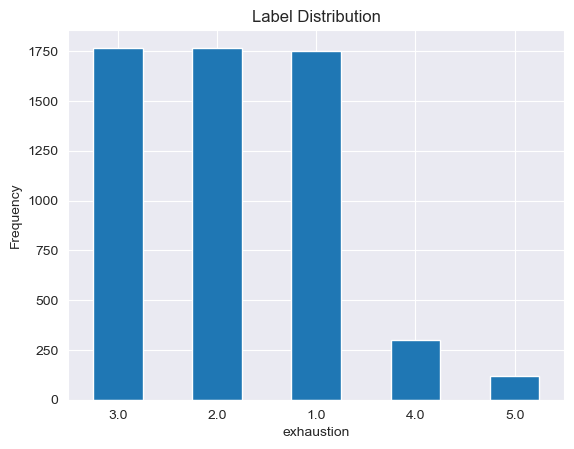

In [105]:
df['exhaustion'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()

In [106]:
ccn = pd.crosstab(df['exhaustion'],df['intensity'])
ccn

intensity,intense,light,moderate,very intense,very light
exhaustion,,,,,
1.0,211,877,0,0,663
2.0,0,619,1146,0,0
3.0,1316,451,0,0,0
4.0,0,0,0,301,0
5.0,121,0,0,0,0


<Axes: xlabel='exhaustion'>

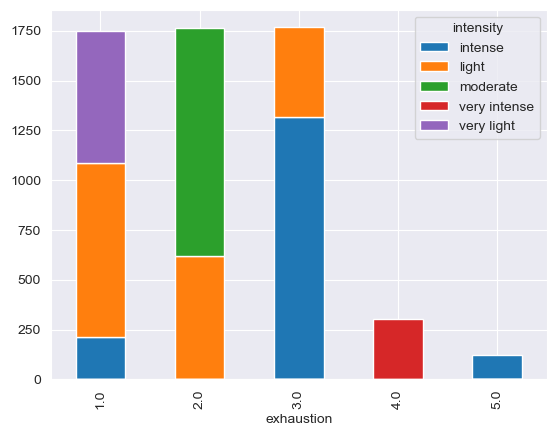

In [107]:
ccn.plot(kind = 'bar', stacked=True)

In [108]:
ccn = pd.crosstab(df['exhaustion'],df['intensity_label'])
ccn

intensity_label,0,1,2,3,4
exhaustion,,,,,
1.0,211,877,0,0,663
2.0,0,619,1146,0,0
3.0,1316,451,0,0,0
4.0,0,0,0,301,0
5.0,121,0,0,0,0


<Axes: xlabel='exhaustion'>

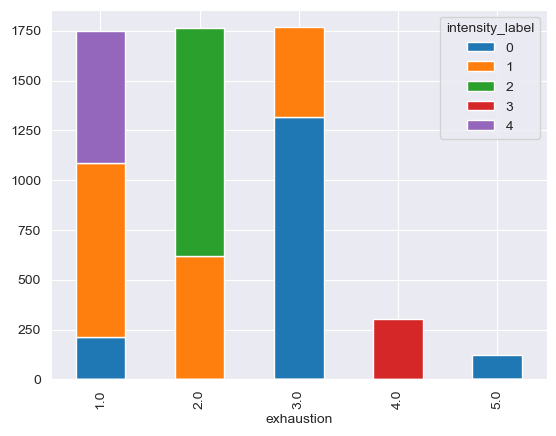

In [109]:
ccn.plot(kind = 'bar', stacked=True)

#### Skewness

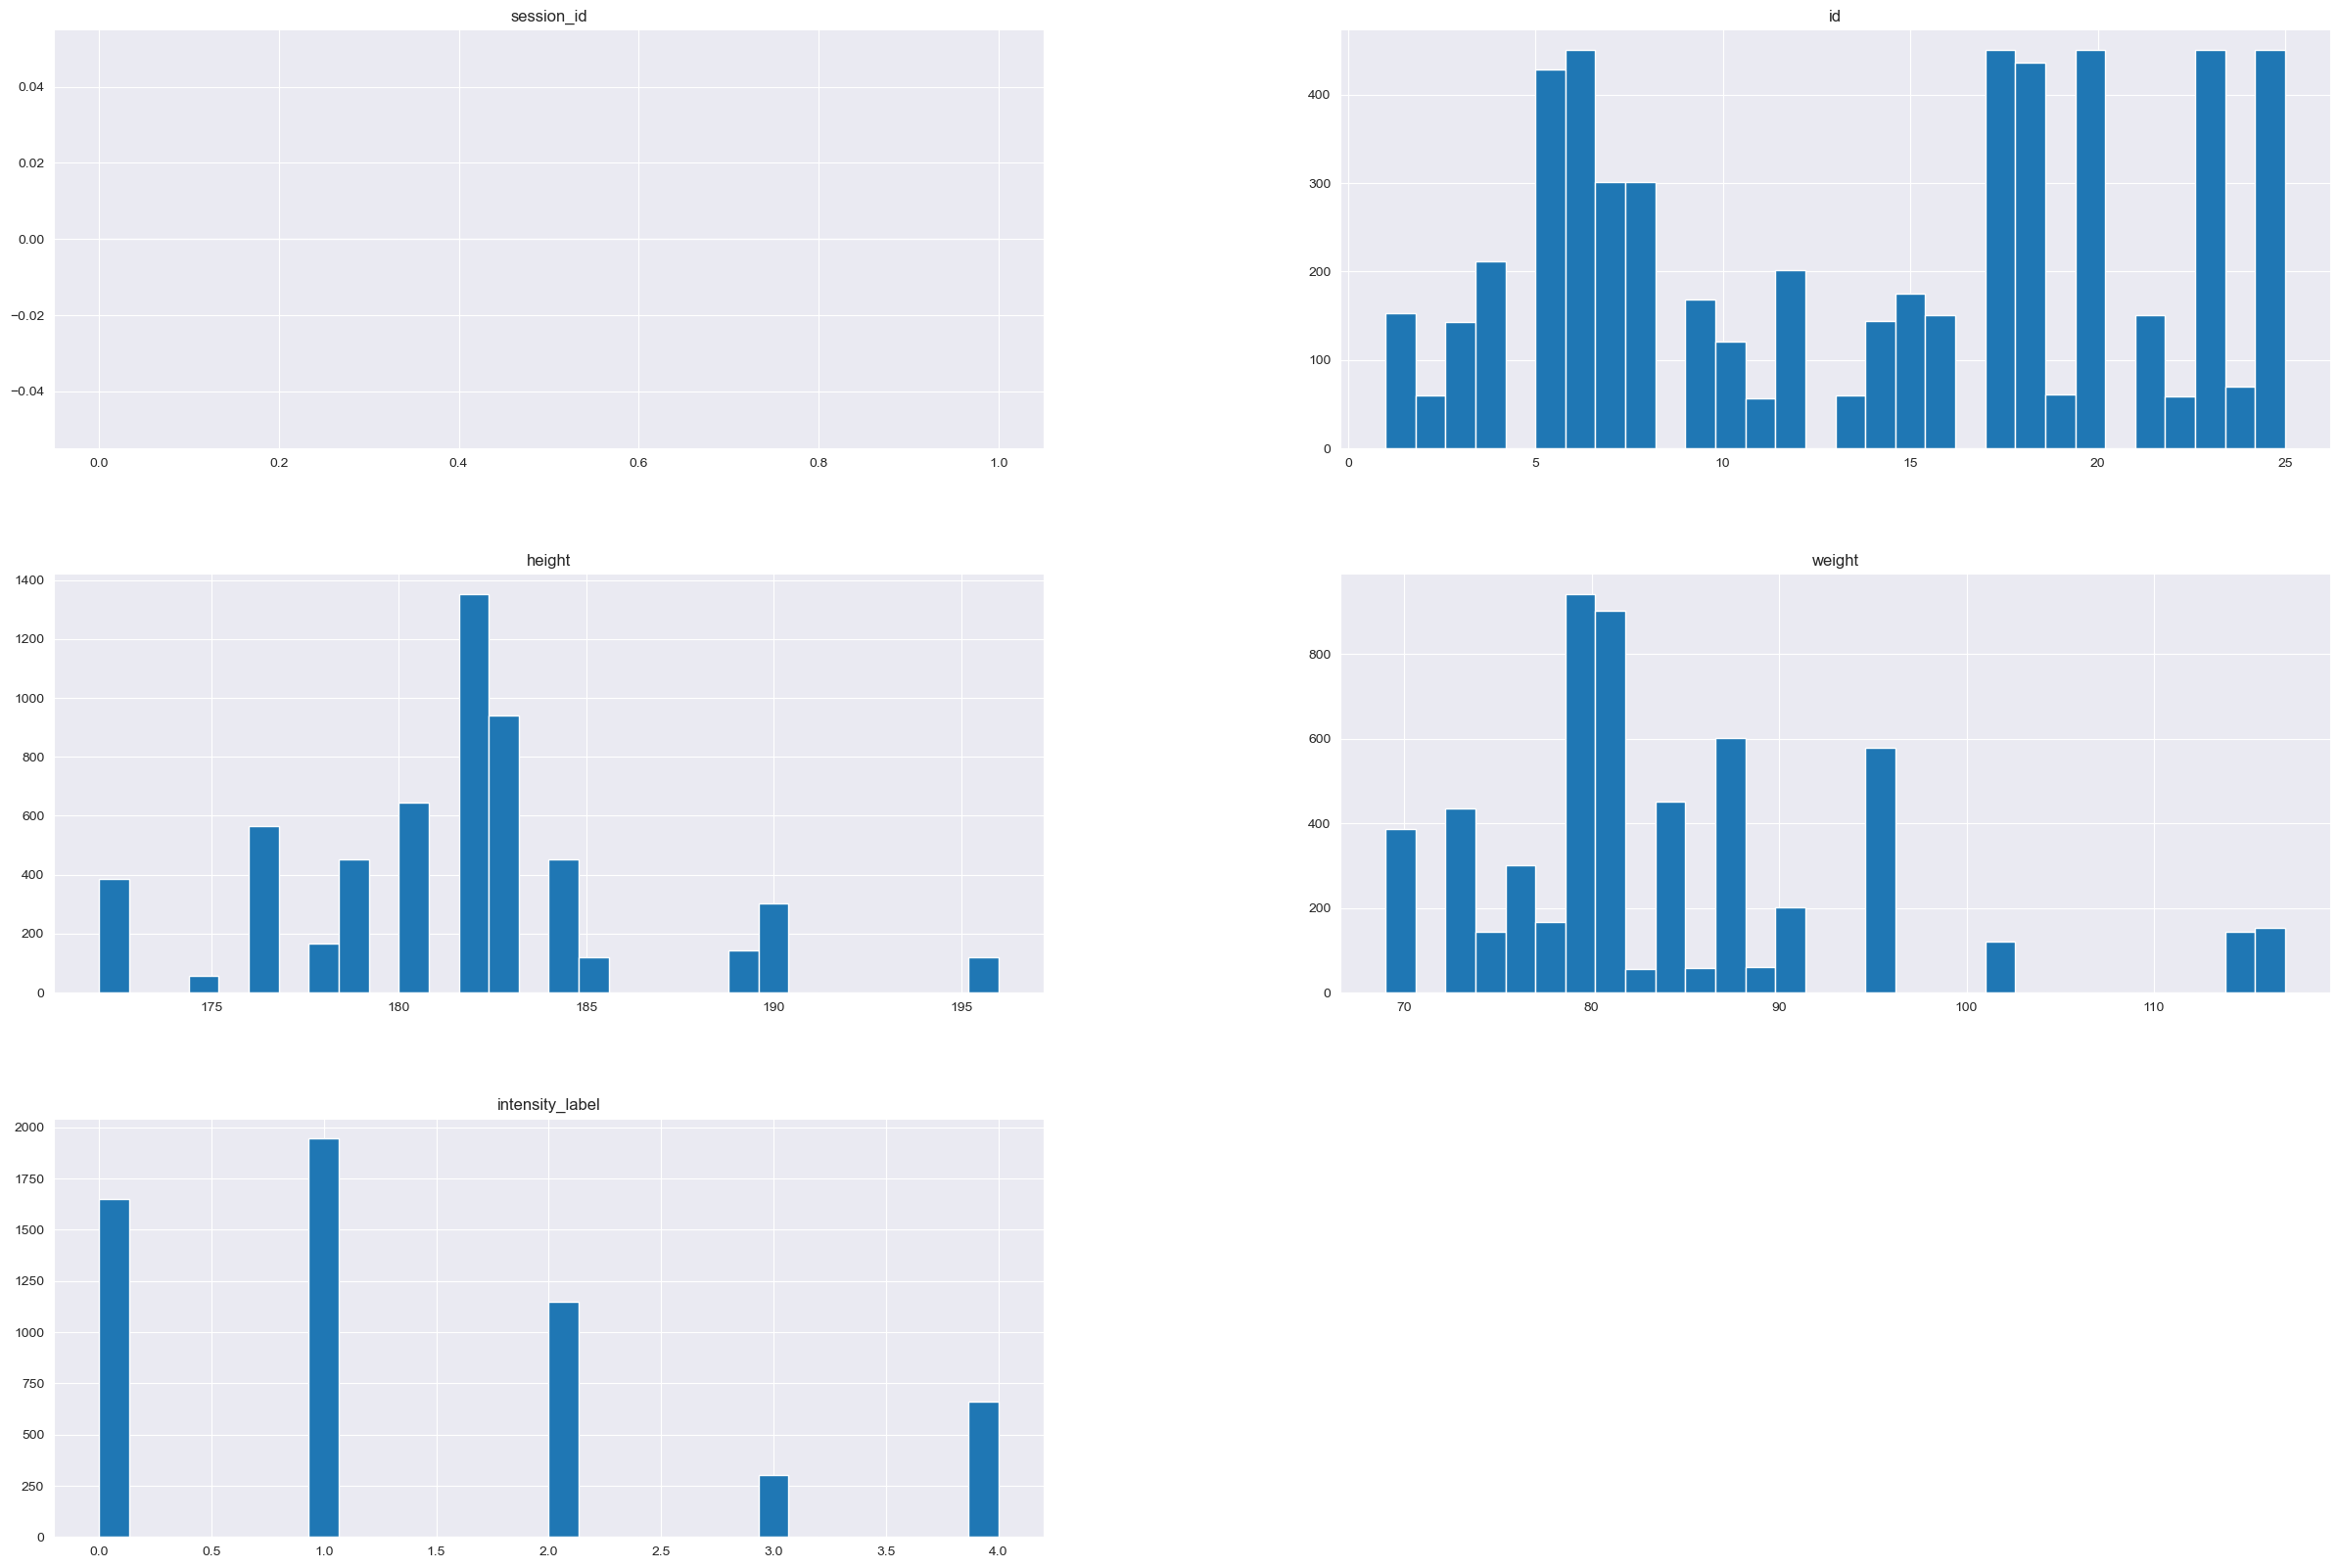

In [110]:
df_n = df.select_dtypes(include = 'number')
df_n.hist(figsize = (30,20), bins = 30)
plt.show()

### Standard Deviation and outliers

In [111]:
for i in df.select_dtypes(include = 'number'):
    std = round(df[i].std(),3)
    print(i,'-','std:',std)

session_id - std: nan
id - std: 7.345
height - std: 4.64
weight - std: 10.454
intensity_label - std: 1.27


In [112]:
def is_outlier(x,k):
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    iqr = q3-q1
    outliers=list()
    for i in x:
        if (i<q1-k*iqr) or (i>q3+k*iqr):
            outliers.append(i)
    return np.array(outliers)  

In [113]:
for i in df_n:
    outliers=is_outlier(df_n[i], k = 3)
    nr_outliers=len(outliers)
    print(i,'outliers:',nr_outliers,'- percentuale',round((nr_outliers*100)/len(df[i]),3),'%') 

session_id outliers: 0 - percentuale 0.0 %
id outliers: 0 - percentuale 0.0 %
height outliers: 121 - percentuale 2.121 %
weight outliers: 0 - percentuale 0.0 %
intensity_label outliers: 0 - percentuale 0.0 %


### Correlation

In [114]:
df_n.corr(method = "pearson").style.background_gradient(cmap = 'coolwarm', vmin = -1, vmax = 1)

,session_id,id,height,weight,intensity_label
session_id,nan,nan,nan,nan,nan
id,nan,1.000000,-0.074639,-0.153833,0.085627
height,nan,-0.074639,1.000000,0.811450,0.244178
weight,nan,-0.153833,0.811450,1.000000,0.309654
intensity_label,nan,0.085627,0.244178,0.309654,1.000000


In [115]:
df = df.drop(['height'], axis = 1) #The correlation between height and weight is very high